In [6]:
from transformers import logging
logging.set_verbosity_error()
from transformers.utils import logging
logging.disable_progress_bar()


In [1]:
!pip install transformers torch -q # так мы устанавливаем модули

**Сгенерируем текст**

In [23]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="sberbank-ai/rugpt3small_based_on_gpt2"
)

**Что мы тут делаем?**

*pipeline* — это высокоуровневая обёртка из библиотеки transformers.

мы могли бы вызвать нужный нам инструмент следующим методом:

```
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "sberbank-ai/rugpt3small_based_on_gpt2"

# 1. Загружаем токенизатор
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 2. Загружаем модель
model = AutoModelForCausalLM.from_pretrained(model_name)

# 3. Текст
prompt = "Компьютерная лингвистика — это"

# 4. Токенизация (текст → числа)
inputs = tokenizer(prompt, return_tensors="pt")

# 5. Генерация (числа → новые числа)
output_ids = model.generate(
    **inputs,
    max_new_tokens=80,
    do_sample=True
)

# 6. Декодирование (числа → текст)
generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(generated_text)

```

Но нам помогли и pipeline делает все это сам, т.е.:


1.   загружает модель
2.   загружает токенизатор
3.   связывает их
4.   настраивает тип задачи
5.   возвращает удобный объект для вызова

**Что такое "text-generation" в вызове pipeline?**

Мы говорим библиотеке:

> Я хочу модель для генерации текста.

*pipeline автоматически*:

*   выберет правильный класс модели
*   настроит метод generate
*   будет возвращать generated_text


В других задачах мы могли бы использовать "sentiment-analysis", "translation", "summarization".

**А что такое sberbank-ai/rugpt3small_based_on_gpt2?**

Это название LLM-модели.

Что внутри:

* Архитектура: GPT-2 (decoder-only transformer)
* Язык: русский
* Размер: small (уменьшенная версия)
* Тип: autoregressive language model

То есть модель обучена:

> предсказывать следующий токен по предыдущим

*В контексте языковой модели токен — это минимальная единица текста, с которой работает модель (это не всегда слово).*


**Что значит предсказывает?**

У нас есть текст, к примеру:


> Компьютерная лингвистика — это

Модель получает токены: **[t1, t2, t3, t4]**

И она вычисляет простую вероятность: **P(next_token | t1, t2, t3, t4)**

К примеру:

| Токен      | Вероятность |
| ---------- | ----------- |
| наука      | 0.32        |
| область    | 0.21        |
| дисциплина | 0.18        |
| метод      | 0.05        |
| ...        | ...         |

И таким образом мы уже имеем:

> Компьютерная лингвистика — это **наука**




In [24]:
prompt = "Компьютерная лингвистика — это"

result = generator(prompt, max_length=80, do_sample=True) # max_length - длина prompt + длина сгенерированного текста.

print(result[0]["generated_text"])

Компьютерная лингвистика — это наука, изучающая лингвистику более чем со школьной скамьи.  В основе ее лежит изучение диалекта, а также синтаксиса.  В лингвистике в целом изучаются и диалектные структуры, и синтаксис и семантика, и структура, и семантика.  В лингвистике также изучается и семантика, и синтаксис, и семантика, и синтаксис, и семантика.  С другой стороны, предметом лингвистики являются лингвистические исследования, направленные на изучение специфики и содержания языкового общения.  В России лингвистика изучает языкознание, и в ней изучаются следующие аспекты: лингвистические исследования; лингвистическая работа; филологический аспект; лингвистическая культура; лингвистическое самосознание и др. 
 Таким образом, лингвистика изучает языкознание в целом по всему комплексу отраслей, в том числе и собственно языкознание, в том числе в лингвистике — в частности, в лингвистике в целом по всем отраслям, включая филологию, лингвистику, лингвистику, лингвистику, лингвистику, лингвис

**Поговорим про do_sample=True**

*   *Если do_sample=False*

Модель всегда выбирает токен с максимальной вероятностью.

Поведение:

*  детерминированное
*  каждый раз одинаковый результат
*  часто сухой и повторяющийся текст

*  *Если do_sample=True*

Модель **случайно** выбирает токен из распределения вероятностей. Но! Вероятности учитываются как весы.

Это делает текст:

*  более разнообразным
*  менее предсказуемым
*  иногда менее стабильным


**Поиграем еще**

In [25]:
text = result[0]["generated_text"] # сохраняем текст в переменную
print(text)

Компьютерная лингвистика — это наука, изучающая лингвистику более чем со школьной скамьи.  В основе ее лежит изучение диалекта, а также синтаксиса.  В лингвистике в целом изучаются и диалектные структуры, и синтаксис и семантика, и структура, и семантика.  В лингвистике также изучается и семантика, и синтаксис, и семантика, и синтаксис, и семантика.  С другой стороны, предметом лингвистики являются лингвистические исследования, направленные на изучение специфики и содержания языкового общения.  В России лингвистика изучает языкознание, и в ней изучаются следующие аспекты: лингвистические исследования; лингвистическая работа; филологический аспект; лингвистическая культура; лингвистическое самосознание и др. 
 Таким образом, лингвистика изучает языкознание в целом по всему комплексу отраслей, в том числе и собственно языкознание, в том числе в лингвистике — в частности, в лингвистике в целом по всем отраслям, включая филологию, лингвистику, лингвистику, лингвистику, лингвистику, лингвис

In [26]:
import pandas as pd # библиотека для обработки и анализа данных, в частности структурированных данных, размещённых в таблицах.

!pip install spacy -q # устанавливаем библиотку для токенизации, лемматизации и других удивительных приключений
!python -m spacy download ru_core_news_sm # установка языковой модели, обучена на новостных текстах

import spacy # вызываем библиотку


nlp = spacy.load("ru_core_news_sm") # загружаем языковую модель

doc = nlp(text)

keep = {"NOUN", "VERB", "ADJ", "PROPN"} # чуть-чуть уберегаем себя от "мусора"

data = []

for token in doc:
    if token.pos_ not in keep:
        continue

    data.append({
        "Token": token.text,
        "Lemma": token.lemma_,
        "POS": token.pos_,
        "Morph": str(token.morph)
    })

pd.DataFrame(data).head(25) # укладываем все в табличный вид для просмотра (но таблицы нужны и для других целей!)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 24.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,Token,Lemma,POS,Morph
0,Компьютерная,компьютерный,ADJ,Case=Nom|Degree=Pos|Gender=Fem|Number=Sing
1,лингвистика,лингвистика,NOUN,Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing
2,наука,наука,NOUN,Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing
3,изучающая,изучать,VERB,Aspect=Imp|Case=Nom|Gender=Fem|Number=Sing|Ten...
4,лингвистику,лингвистику,NOUN,Animacy=Anim|Case=Dat|Gender=Masc|Number=Sing
5,школьной,школьный,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing
6,скамьи,скамья,NOUN,Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing
7,основе,основа,NOUN,Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
8,лежит,лежать,VERB,Aspect=Imp|Mood=Ind|Number=Sing|Person=Third|T...
9,изучение,изучение,NOUN,Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing


**Можно и чуть более визуально:)**

Перед нами формальная модель синтаксиса:

In [27]:
from spacy import displacy # вызываем встроенный модуль визуализации в spaCy

doc = nlp(text[:250])  # короткий кусок, чтобы не было простыни
displacy.render(doc, style="dep", jupyter=True) # просим показать главное слово, зависимые слова,типы синтаксических связей


**Про морфологию**

In [28]:
words = ["наука", "науки", "науку", "наукой"]

rows = []
for w in words:
    t = nlp(w)[0]
    rows.append({
        "Form (token)": t.text,
        "Lemma": t.lemma_,
        "POS": t.pos_,
        "Morph": str(t.morph)
    })

pd.DataFrame(rows)


,Form (token),Lemma,POS,Morph
0,наука,наука,NOUN,Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing
1,науки,наука,NOUN,Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing
2,науку,наука,NOUN,Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing
3,наукой,наука,NOUN,Animacy=Inan|Case=Ins|Gender=Fem|Number=Sing


**Что мы видим:**

формы разные → лемма одна + Morph показывает, чем отличаются формы (Case/Number/Gender)

разберем, что написано (последняя строчка):
* Inan = inanimate → неодушевлённое.
* Ins = instrumental → творительный падеж.
* Fem = feminine → женский род.
* Sing = singular → единственное число.

Для нас очевидно, для модели - это набор формальных признаков.

**Про синтаксис**

он описывает структуру предложения. Повторим наш опыт.

In [29]:
text2 = "Модель генерирует текст, предсказывая следующий токен."
doc2 = nlp(text2)
displacy.render(doc2, style="dep", jupyter=True)


In [30]:
rows = []
for t in doc2:
    if t.is_space:
        continue
    rows.append({
        "Token": t.text,
        "POS": t.pos_,
        "Head": t.head.text,
        "Dep": t.dep_
    })

pd.DataFrame(rows)


,Token,POS,Head,Dep
0,Модель,NOUN,генерирует,nsubj
1,генерирует,VERB,генерирует,ROOT
2,текст,NOUN,генерирует,obj
3,",",PUNCT,предсказывая,punct
4,предсказывая,VERB,генерирует,advcl
5,следующий,ADJ,токен,amod
6,токен,NOUN,предсказывая,obj
7,.,PUNCT,генерирует,punct


**Что мы видим?**

У каждого слова есть “голова” (head).

Dep — тип связи (например, nsubj, obj, root).

**То есть у нас появился граф/структура, а не “плоский текст”.**

 ----


**Осталось поговорить про семантику**

In [31]:
!pip install -q sentence-transformers # библиотека для работы с эмбеддингами предложений.

In [32]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

sents = [
    "Компьютерная лингвистика изучает язык с помощью алгоритмов.",
    "КомпиЛинг занимается автоматической обработкой текста.",
    "Я люблю мороженое и гулять у моря."
]

emb = model.encode(sents, normalize_embeddings=True)
sim01 = float(np.dot(emb[0], emb[1]))
sim02 = float(np.dot(emb[0], emb[2]))

print("Семантическая близость (0↔1):", round(sim01, 3))
print("Семантическая близость (0↔2):", round(sim02, 3))


Семантическая близость (0↔1): 0.686
Семантическая близость (0↔2): -0.035


**Что мы видим?**

Первые два предложения к друг другу заметно ближе, чем первое и третье.
Посмотрим на это в векторном пространстве:

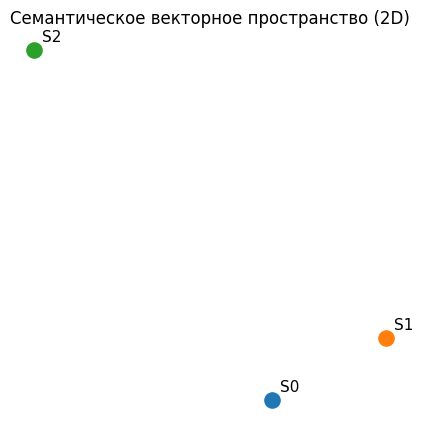

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# косинусная близость
S = emb @ emb.T

# переводим в расстояния
D = 1 - S

# MDS — размещаем точки в 2D так,
# чтобы расстояния в плоскости были близки к реальным
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(D)

plt.figure(figsize=(5,5))

for i, sent in enumerate(sents):
    x, y = coords[i]
    plt.scatter(x, y, s=120)
    plt.text(x + 0.02, y + 0.02, f"S{i}", fontsize=11)

plt.title("Семантическое векторное пространство (2D)")
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.show()


**И еще немного про векторы**

In [38]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Загружаем ту же модель
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

text = "Компьютерная лингвистика"

# Получаем вектор (без нормализации, чтобы показать «сырой»)
vector = model.encode(text, normalize_embeddings=False)

print("Размерность вектора:", vector.shape)
print("\nПервые 10 координат:")
print(np.round(vector[:10], 4))

print("\nНорма вектора (длина):", round(np.linalg.norm(vector), 4))


Размерность вектора: (384,)

Первые 10 координат:
[ 0.0493 -0.1978 -0.1107 -0.3036 -0.2907 -0.2753 -0.0194 -0.0427  0.2178
  0.0377]

Норма вектора (длина): 4.9357


**Вспомним классику: King − Man + Woman = ?**

In [42]:
# Установка gensim - библиотека для работы с распределёнными представлениями текста и тематическими моделями.
!pip install -q gensim

# Импорт
import gensim.downloader as api

# Загрузка предобученных word-векторов (GloVe, 100 измерений)
wv = api.load("glove-wiki-gigaword-100")

print("Модель загружена.")
print("Размерность векторов:", wv.vector_size)
print("Размер словаря:", len(wv))


Модель загружена.
Размерность векторов: 100
Размер словаря: 400000


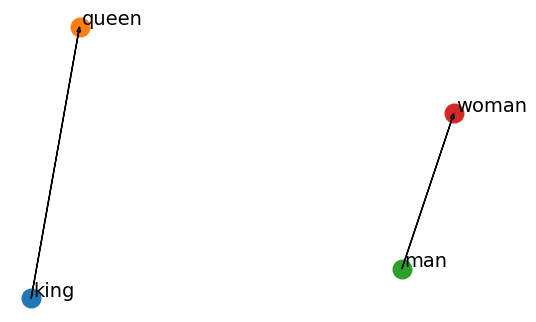

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ["king", "queen", "man", "woman"]
X = np.vstack([wv[w] for w in words])

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

pos = {w: X2[i] for i, w in enumerate(words)}

plt.figure(figsize=(6,6))

# точки
for w in words:
    x, y = pos[w]
    plt.scatter(x, y, s=180)
    plt.text(x + 0.03, y + 0.03, w, fontsize=14)

# стрелки гендерного сдвига
def arrow(a, b):
    ax, ay = pos[a]
    bx, by = pos[b]
    plt.arrow(ax, ay, bx-ax, by-ay,
              length_includes_head=True,
              head_width=0.05)

arrow("man", "woman")
arrow("king", "queen")

plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.box(False)
plt.show()


Иными словами: **king − man + woman ≈ queen**